# Sampling Distributions

In [9]:
import pandas as pd
attrition_pop = pd.read_feather('C:\\Users\\yazan\\Desktop\\Data_Analytics\\8-Sampling in Python\\Datasets\\attrition.feather')


# 1. Relative error of point estimates

<b>1.1 Calculating relative errors</b>

The size of the sample you take affects how accurately the point estimates reflect the corresponding population parameter. For example, when you calculate a sample mean, you want it to be close to the population mean. However, if your sample is too small, this might not be the case.

The most common metric for assessing accuracy is relative error. This is the absolute difference between the population parameter and the point estimate, all divided by the population parameter. It is sometimes expressed as a percentage.

In [10]:
# Generate a simple random sample of 50 rows, with seed 2022
attrition_srs50 = attrition_pop.sample(n=50, random_state=2022)

# Calculate teh mean employee attrition in the population sampel
mean_attrition_pop = attrition_pop['Attrition'].mean()

# Calculate the mean employee attrition in the sample
mean_attrition_srs50 = attrition_srs50['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct50 = 100 * abs(mean_attrition_pop-mean_attrition_srs50)/mean_attrition_pop

# Print rel_error_pct50
print(rel_error_pct50)

62.78481012658227


In [11]:
# Generate a simple random sample of 100 rows, with seed 2022
attrition_srs100 = attrition_pop.sample(n=100, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct100 = 100 * abs(mean_attrition_pop - mean_attrition_srs100)/mean_attrition_pop

# Print rel_error_pct100
print(rel_error_pct100)

6.962025316455695


As you increase the sample size, the sample mean generally gets closer to the population mean, and the relative error decreases.

# 2. Creating a sampling distribution

<b>2.1 Replicating samples</b>

When you calculate a point estimate such as a sample mean, the value you calculate depends on the rows that were included in the sample. That means that there is some randomness in the answer. In order to quantify the variation caused by this randomness, you can create many samples and calculate the sample mean (or another statistic) for each sample.

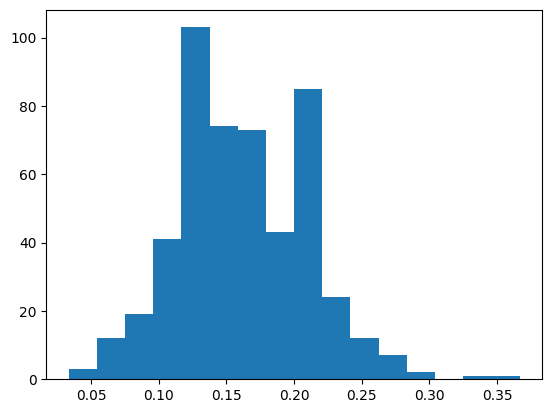

In [12]:
import matplotlib.pyplot as plt
# Create an empty list
mean_attritions = []
# Loop 500 times to create 500 sample means
for i in range(500):
	mean_attritions.append(
    	attrition_pop.sample(n=60)['Attrition'].mean()
	)

# Create a histogram of the 500 sample means
plt.hist(mean_attritions, bins=16)
plt.show()

By generating the sample statistic many times with different samples, you can quantify the amount of variation in those statistics.

<b>2.2 Replication parameters</b>

There are two parameters that effect the range sample distribution range: the size of each simple random sample, and the number of replicates. It's important to understand how each of these parameters affects the result. Use the parameter sliders to explore different values and note their effect on the histogram.


<b>Question</b>

Which statement about the effect of each parameter on the distribution of sample means is true?

Possible Answers:

- As the sample size increases, the range of calculated sample means tends to increase.

- As the number of replicates increases, the range of calculated sample means tends to increase.

- As the sample size increases, the range of calculated sample means tends to decrease.  (True)

- As the number of replicates increases, the range of calculated sample means tends to decrease.

As sample size increases, on average each sample mean has a lower relative error compared to the population mean, thus reducing the range of the distribution.

# 3. Approximate sampling distributions

3.1 Exact sampling distribution

To quantify how the point estimate (sample statistic) you are interested in varies, you need to know all the possible values it can take and how often. That is, you need to know its distribution.

The distribution of a sample statistic is called the sampling distribution. When we can calculate this exactly, rather than using an approximation, it is known as the exact sampling distribution.

Let's take a look at the sampling distribution of dice rolls. This time, we'll look at five eight-sided dice. (These have the numbers one to eight.)

The expand_grid() function is also available, which expects a dictionary of key-value pairs as its argument. The definition of the expand_grid() function is provided in the pandas documentation(https://pandas.pydata.org/pandas-docs/version/0.17.1/cookbook.html#sql).

```python:
 def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())
```

In [13]:
'''
Expand a grid representing 5 8-sided dice. That is, create a DataFrame with five columns from a dictionary, 
named die1 to die5. The rows should contain all possibilities for throwing five dice, each numbered 1 to 8.'''

import pandas as pd
import itertools
def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

# Expand a grid representing 5 8-sided dice
dice = expand_grid(

    {'die1':[1, 2, 3, 4, 5, 6, 7, 8],
     'die2':[1, 2, 3, 4, 5, 6, 7, 8],
     'die3':[1, 2, 3, 4, 5, 6, 7, 8],
     'die4':[1, 2, 3, 4, 5, 6, 7, 8],
     'die5':[1, 2, 3, 4, 5, 6, 7, 8],
    }
)

# Print the result
print(dice)

       die1  die2  die3  die4  die5
0         1     1     1     1     1
1         1     1     1     1     2
2         1     1     1     1     3
3         1     1     1     1     4
4         1     1     1     1     5
...     ...   ...   ...   ...   ...
32763     8     8     8     8     4
32764     8     8     8     8     5
32765     8     8     8     8     6
32766     8     8     8     8     7
32767     8     8     8     8     8

[32768 rows x 5 columns]


In [17]:
'''Add a column, mean_roll, to dice, that contains the mean of the five rolls as a categorical.'''

# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] = (dice['die1'] + dice['die2'] + 
                     dice['die3'] + dice['die4'] + 
                     dice['die5']) / 5
                                  
dice['mean_roll'] = dice['mean_roll'].astype('category')

# Print result
print(dice)

       die1  die2  die3  die4  die5 mean_roll
0         1     1     1     1     1       1.0
1         1     1     1     1     2       1.2
2         1     1     1     1     3       1.4
3         1     1     1     1     4       1.6
4         1     1     1     1     5       1.8
...     ...   ...   ...   ...   ...       ...
32763     8     8     8     8     4       7.2
32764     8     8     8     8     5       7.4
32765     8     8     8     8     6       7.6
32766     8     8     8     8     7       7.8
32767     8     8     8     8     8       8.0

[32768 rows x 6 columns]


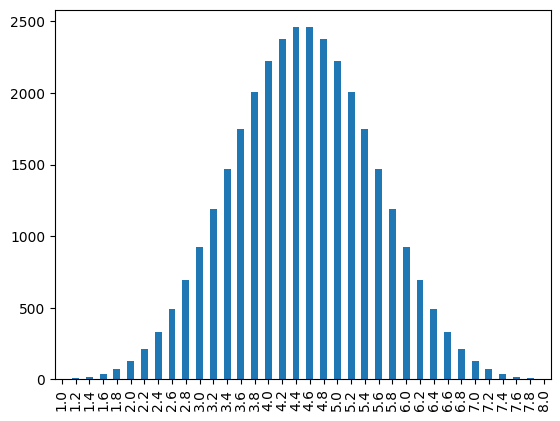

In [18]:
'''
Create a bar plot of the mean_roll categorical column, so it displays the count of each mean_roll 
in increasing order from 1.0 to 8.0.'''

import matplotlib.pyplot as plt
# Draw a bar plot of mean_roll
dice['mean_roll'].value_counts(sort=False).plot(kind='bar')
plt.show()

The exact sampling distribution shows all possible variations of the point estimate that you are interested in.